In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import random
from pydataset import data
random.seed(777)

In [2]:
churn = pd.read_csv('/Users/CryanRedrose/codeup-data-science/CodeUp/telco-churn.xls')

## Exercises
### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like.

### 1. Has the network latency gone up since we switched internet service providers?

- I prefered two tests: 
1. Is there a difference in latency?
    - $H_{0}$ network latency with ISP A == network latency with ISP B <br>
    - $H_{A}$ network latency with ISP A != network latency with ISP B

2. Did latency with ISP B get worse? (go up)
    - $H_{0}$ network latency with ISP B > network latency with ISP A
    - $H_{A}$ network latency with ISP B <= network latency with ISP A

- True positive:
    - Network latency with ISP B is not different than Network latency with ISP A and it is true
- True negative:
    - Network latency with ISP B is different than Network latency with ISP A and it is true
- False positive:
    - Network latency with ISP B is not different than Network latency with ISP A but it is not true
- False negative:
    - Network latency with ISP B is diffeent than Network latency with ISP A but we claimed it was not different

### 2. Is the website redesign any good?

### 3. Is our television ad driving more sales?

#### Did sales increase after new adverts?
    
$H_{0}$ $\overline{sales}$ prior to new adverts >= $\overline{sales}$ post new adverts <br>
$H_{A}$ $\overline{sales}$ prior to new adverts < $\overline{sales}$ post new adverts 
     
- True positive:
     - sales post new adverts > than pre adverts and true
- True negative:
    - sales post new adverts <= than pre adverts and true
- False positive:
    - sales post new adverts > than pre adverts but false
- False negative:
    - sale post new adverts <= than pre adverts but false

## Exercises Cont ...

### 1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?
- Are adults who drink milk taller than adults who dont drink milk?
- Is the the price of gas higher in texas or in new mexico?
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

1. Two-tailed, one sample

|||  
|-|----------|
|$H_0$:| Grades of second floor students == Grades of all other students|
|$H_A$:| Grades of second floor students != Grades of all other students |

2. One-tailed, two samples

|||  
|-|----------|
|$H_0$:| Height of adults who drink milk <= Height of adults who do not drink milk |
|$H_A$:| Height of adults who drink milk > Height of adults who do not drink milk |

3. One-tailed, two samples <br>
- This one should be split into two questins to avoid bias in the question:
$H_0$ Price of Gas in New Mexico == Price of Gas in Texas <br>
$H_A$ Price of Gas in New Mexico != Price of Gas in Texas 
- Here we need to figure out which one we want to know. Is the interesting question involving whether gas prices are higher in Texas or is it that gas prices are higher in New Mexico?
$H_0$ Price of Gas in New Mexico >= Gas prices in Texas <br>
$H_A$ Price of Gas in New Mexico < Price of Gas in Texas

4. ANOVA, three samples <br>
- This can be done with a joint hypothesis (stress of group 1 = group 2 = group 3) but it can be done with two tests also

$H_0$ Stress Group 1 == Group 2 == Group 3 <br>
$H_A$ Stress for Group != for any group

- alternative tests <br>
$H_0$ Stress Group 1 == Group 2 <br>
$H_0$ Stress Group 1 == Group 3 <br>

    If either hypothesis fails, then the equality does not hold across all groups <br> 
    $H_A$ Stress Group 1 != Group 2 != Group 3 <br>



### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

### A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
### A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

- group 1 <br>
    sample size: 40 <br> $\mu$ 90 days <br> $\sigma$ 15 days <br> 
- group 2 <br>
    sample size: 50 <br> $\mu$ 100 days <br> $\sigma$ 20 days <br> 
    
$H_0$ average time to get to the office: group 1 == group 2 <br> 
    *** \beta_1 = \beta_2 with \alpha = 0.05 *** <br>
$H_A$ average time to get to the office: group 1 != group 2 <br> 


- Continuous variables of discrete groups
- Two samples
- Two tailed test

In [8]:
alpha = 0.05
gp1_obs = 40
gp1_mean = 90
gp1_sd = 15
gp2_obs = 50
gp2_mean = 100
gp2_sd = 20

- Continuous variables of discrete groups
- Two samples
- Two tailed test

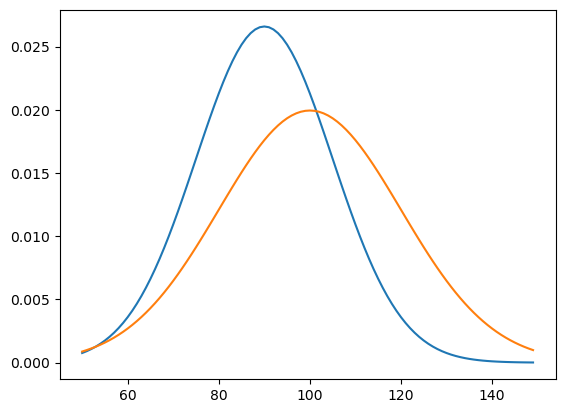

In [29]:
x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)

plt.plot(x,y1)
plt.plot(x,y2)

In [30]:
# generating random sample observations for our two groups

# 90 and 100 represent the mean, 15 and 20 represent the standard deviation
# rvs is the number of observations for the samples
office_1 = stats.norm(90,15).rvs(40)
office_2 = stats.norm(100,20).rvs(50)

print(round(office_1.var(),3), round(office_2.var(),3))

169.11 452.558


In [36]:
tstat, pval = stats.levene(office_1,office_2)
print(pval, tstat)
if pval < alpha:
    print('We can reject H0')
else:
    print('We cannot reject H0')

0.03716213409371288 4.477810300809561
We can reject H0


In [37]:
tstat, pval - stats.ttest_ind(office_1,office_2, equal_var = True)
print(f't-stat: {round(tstat,5)}')
print('p-value:',round(pval,5))

t-stat: 4.47781
p-value: 0.03716


In [38]:
if pval < 0.05:
    print('We can reject H0')
else:
    print('We cannot reject H0')

We can reject H0


### 3. Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

$H_0$ fuel efficiency between cars: <br>
$\beta$ year2008 != $\beta$ year1999

$H_A$ fuel efficiency between cars: <br>
$\beta$ year2008 == $\beta$ year1999

- two tailed test, two samples